In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Setup successful!")


Setup successful!


In [4]:
import pandas as pd

# Load datasets
trader_df = pd.read_csv("../data/historical_data.csv")
sentiment_df = pd.read_csv("../data/fear_greed_index.csv")

# Check shape
print("Trader data shape:", trader_df.shape)
print("Sentiment data shape:", sentiment_df.shape)


Trader data shape: (211224, 16)
Sentiment data shape: (2644, 4)


In [5]:
# Preview data
trader_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [6]:
sentiment_df.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [7]:
trader_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [8]:
sentiment_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [9]:
print(trader_df.columns)
print(sentiment_df.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [10]:
# Convert trader timestamp to datetime
trader_df["Timestamp"] = pd.to_datetime(trader_df["Timestamp"], errors="coerce")

# Create date column
trader_df["trade_date"] = trader_df["Timestamp"].dt.date

trader_df[["Timestamp", "trade_date"]].head()


,Timestamp,trade_date
0,1970-01-01 00:28:50,1970-01-01
1,1970-01-01 00:28:50,1970-01-01
2,1970-01-01 00:28:50,1970-01-01
3,1970-01-01 00:28:50,1970-01-01
4,1970-01-01 00:28:50,1970-01-01


In [11]:
# Convert sentiment date
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"], errors="coerce")

# Create date column
sentiment_df["sentiment_date"] = sentiment_df["date"].dt.date

sentiment_df[["date", "sentiment_date", "classification"]].head()


,date,sentiment_date,classification
0,2018-02-01,2018-02-01,Fear
1,2018-02-02,2018-02-02,Extreme Fear
2,2018-02-03,2018-02-03,Fear
3,2018-02-04,2018-02-04,Extreme Fear
4,2018-02-05,2018-02-05,Extreme Fear


In [12]:
print("Trader date range:")
print(trader_df["trade_date"].min(), "→", trader_df["trade_date"].max())

print("\nSentiment date range:")
print(sentiment_df["sentiment_date"].min(), "→", sentiment_df["sentiment_date"].max())


Trader date range:
1970-01-01 → 1970-01-01

Sentiment date range:
2018-02-01 → 2025-05-02


In [13]:
trader_df["Timestamp"].head(10)
trader_df["Timestamp"].dtype


dtype('<M8[ns]')

In [14]:
# Convert Unix timestamp (milliseconds) to datetime
trader_df["Timestamp"] = pd.to_datetime(
    trader_df["Timestamp"], 
    unit="ms", 
    errors="coerce"
)

# Create trade date
trader_df["trade_date"] = trader_df["Timestamp"].dt.date

trader_df[["Timestamp", "trade_date"]].head()


,Timestamp,trade_date
0,1970-01-01 00:28:50,1970-01-01
1,1970-01-01 00:28:50,1970-01-01
2,1970-01-01 00:28:50,1970-01-01
3,1970-01-01 00:28:50,1970-01-01
4,1970-01-01 00:28:50,1970-01-01


In [15]:
print("Trader date range:")
print(trader_df["trade_date"].min(), "→", trader_df["trade_date"].max())


Trader date range:
1970-01-01 → 1970-01-01


In [16]:
# Reload raw data fresh (no conversions applied)
raw_trader_df = pd.read_csv("../data/historical_data.csv")

raw_trader_df["Timestamp"].head(10)


0    1.730000e+12
1    1.730000e+12
2    1.730000e+12
3    1.730000e+12
4    1.730000e+12
5    1.730000e+12
6    1.730000e+12
7    1.730000e+12
8    1.730000e+12
9    1.730000e+12
Name: Timestamp, dtype: float64

In [17]:
raw_trader_df["Timestamp"].describe()


count    2.112240e+05
mean     1.737744e+12
std      8.689920e+09
min      1.680000e+12
25%      1.740000e+12
50%      1.740000e+12
75%      1.740000e+12
max      1.750000e+12
Name: Timestamp, dtype: float64

In [18]:
# Clean sentiment classification
sentiment_df["classification"] = sentiment_df["classification"].str.lower()
sentiment_df["classification"].value_counts()


classification
fear             781
greed            633
extreme fear     508
neutral          396
extreme greed    326
Name: count, dtype: int64

In [19]:
# Reload trader data clean (no previous conversions)
trader_df = pd.read_csv("../data/historical_data.csv")


In [20]:
# Convert Unix timestamp (milliseconds) to datetime
trader_df["Timestamp"] = pd.to_datetime(
    trader_df["Timestamp"],
    unit="ms",
    errors="coerce"
)

# Create trade date
trader_df["trade_date"] = trader_df["Timestamp"].dt.date

trader_df[["Timestamp", "trade_date"]].head()


,Timestamp,trade_date
0,2024-10-27 03:33:20,2024-10-27
1,2024-10-27 03:33:20,2024-10-27
2,2024-10-27 03:33:20,2024-10-27
3,2024-10-27 03:33:20,2024-10-27
4,2024-10-27 03:33:20,2024-10-27


In [21]:
print("Trader date range:")
print(trader_df["trade_date"].min(), "→", trader_df["trade_date"].max())


Trader date range:
2023-03-28 → 2025-06-15


In [22]:
# Keep required sentiment columns only
sentiment_clean = sentiment_df[["sentiment_date", "classification"]].copy()

# Normalize sentiment labels
sentiment_clean["classification"] = sentiment_clean["classification"].str.lower()

sentiment_clean.head()


,sentiment_date,classification
0,2018-02-01,fear
1,2018-02-02,extreme fear
2,2018-02-03,fear
3,2018-02-04,extreme fear
4,2018-02-05,extreme fear


In [23]:
# Merge trader data with sentiment data
merged_df = trader_df.merge(
    sentiment_clean,
    left_on="trade_date",
    right_on="sentiment_date",
    how="left"
)

merged_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,sentiment_date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,2024-10-27,greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,2024-10-27,greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,2024-10-27,greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,2024-10-27,greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,2024-10-27,greed


In [24]:
# Check how many trades got sentiment labels
merged_df["classification"].value_counts(dropna=False)


classification
fear             133871
greed             36289
NaN               26961
neutral            7141
extreme greed      6962
Name: count, dtype: int64

In [25]:
# Percentage of missing sentiment
merged_df["classification"].isna().mean()


np.float64(0.12764174525622088)

In [26]:
merged_df[["trade_date", "classification"]].sample(10)


,trade_date,classification
179283,2025-02-19,fear
85800,2024-10-27,greed
46900,2025-02-19,fear
68448,2025-02-19,fear
45461,2024-10-27,greed
197827,2025-02-19,fear
100062,2025-06-15,NaN
132531,2024-10-27,greed
156065,2024-10-27,greed
168649,2025-02-19,fear


In [27]:
# Create simplified sentiment
merged_df["sentiment_simple"] = merged_df["classification"]

merged_df["sentiment_simple"] = merged_df["sentiment_simple"].replace({
    "extreme fear": "fear",
    "extreme greed": "greed"
})

merged_df["sentiment_simple"].value_counts(dropna=False)


sentiment_simple
fear       133871
greed       43251
NaN         26961
neutral      7141
Name: count, dtype: int64

In [28]:
analysis_df = merged_df[
    merged_df["sentiment_simple"].isin(["fear", "greed"])
].copy()

analysis_df.shape


(177122, 20)

In [29]:
performance_summary = (
    analysis_df
    .groupby("sentiment_simple")
    .agg(
        trade_count=("Closed PnL", "count"),
        avg_pnl=("Closed PnL", "mean"),
        median_pnl=("Closed PnL", "median"),
        win_rate=("Closed PnL", lambda x: (x > 0).mean())
    )
    .reset_index()
)

performance_summary


,sentiment_simple,trade_count,avg_pnl,median_pnl,win_rate
0,fear,133871,50.047622,0.0,0.415146
1,greed,43251,77.838247,0.0,0.453492


In [30]:
risk_summary = (
    analysis_df
    .groupby("sentiment_simple")
    .agg(
        avg_position_size=("Size USD", "mean"),
        median_position_size=("Size USD", "median"),
        max_position_size=("Size USD", "max")
    )
    .reset_index()
)

risk_summary


,sentiment_simple,avg_position_size,median_position_size,max_position_size
0,fear,5259.977837,605.07,3509752.98
1,greed,3581.661513,545.35,814524.17


In [31]:
analysis_df.groupby("sentiment_simple")["Size USD"].describe()


,count,mean,std,min,25%,50%,75%,max
sentiment_simple,,,,,,,,
fear,133871.0,5259.977837,30811.757953,0.0,202.93,605.07,2017.725,3509752.98
greed,43251.0,3581.661513,11478.535320,0.0,112.63,545.35,2222.065,814524.17


In [32]:
# Create risk buckets based on position size
analysis_df["risk_bucket"] = pd.qcut(
    analysis_df["Size USD"],
    q=4,
    labels=["low", "medium", "high", "very_high"]
)

analysis_df["risk_bucket"].value_counts()


risk_bucket
low          44283
very_high    44281
high         44280
medium       44278
Name: count, dtype: int64

In [33]:
risk_pnl_summary = (
    analysis_df
    .groupby(["sentiment_simple", "risk_bucket"])
    .agg(
        trade_count=("Closed PnL", "count"),
        avg_pnl=("Closed PnL", "mean"),
        win_rate=("Closed PnL", lambda x: (x > 0).mean())
    )
    .reset_index()
)

risk_pnl_summary


C:\Users\Mohit Kumar\AppData\Local\Temp\ipykernel_18744\3548635101.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["sentiment_simple", "risk_bucket"])


,sentiment_simple,risk_bucket,trade_count,avg_pnl,win_rate
0,fear,low,30747,0.875637,0.414057
1,fear,medium,35523,5.322947,0.395378
2,fear,high,34788,18.735583,0.430350
3,fear,very_high,32813,177.738746,0.421449
4,greed,low,13536,5.883212,0.522902
5,greed,medium,8755,20.262928,0.462250
6,greed,high,9492,42.776112,0.441846
7,greed,very_high,11468,235.744165,0.374520


In [34]:
trader_sentiment_perf = (
    analysis_df
    .groupby(["Account", "sentiment_simple"])
    .agg(
        trade_count=("Closed PnL", "count"),
        avg_pnl=("Closed PnL", "mean"),
        win_rate=("Closed PnL", lambda x: (x > 0).mean())
    )
    .reset_index()
)

trader_sentiment_perf.head()


,Account,sentiment_simple,trade_count,avg_pnl,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,fear,3356,574.414696,0.405542
1,0x083384f897ee0f19899168e3b1bec365f52a9012,greed,462,-708.887230,0.025974
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,fear,3533,4.839719,0.435041
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,greed,320,64.398269,0.531250
4,0x271b280974205ca63b716753467d5a371de622ab,fear,1136,26.382859,0.430458


In [35]:
# Keep traders with at least 50 trades per sentiment
active_traders = trader_sentiment_perf[
    trader_sentiment_perf["trade_count"] >= 50
].copy()

active_traders.shape


(58, 5)

In [36]:
top_fear_traders = (
    active_traders[active_traders["sentiment_simple"] == "fear"]
    .sort_values("avg_pnl", ascending=False)
    .head(10)
)

top_fear_traders


,Account,sentiment_simple,trade_count,avg_pnl,win_rate
16,0x420ab45e0bd8863569a5efbb9c05d91f40624641,fear,258,710.864435,0.244186
0,0x083384f897ee0f19899168e3b1bec365f52a9012,fear,3356,574.414696,0.405542
32,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,fear,939,364.159142,0.396166
14,0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,fear,141,325.415808,0.560284
47,0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0,fear,95,204.755184,0.884211
18,0x430f09841d65beb3f27765503d0f850b8bce7713,fear,671,164.721171,0.482861
22,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,fear,3806,161.147616,0.495271
57,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,fear,2211,147.192210,0.372230
30,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,fear,932,105.439051,0.439914
53,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,fear,7380,75.043089,0.391057


In [37]:
top_greed_traders = (
    active_traders[active_traders["sentiment_simple"] == "greed"]
    .sort_values("avg_pnl", ascending=False)
    .head(10)
)

top_greed_traders


,Account,sentiment_simple,trade_count,avg_pnl,win_rate
31,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,greed,202,1621.514851,0.514851
19,0x430f09841d65beb3f27765503d0f850b8bce7713,greed,131,1224.813115,0.290076
29,0x6d6a4b953f202f8df5bed40692e7fd865318264a,greed,250,406.157096,1.000000
54,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,greed,5387,264.436281,0.311676
13,0x39cef799f8b69da1995852eea189df24eb5cae3c,greed,144,242.940152,0.527778
48,0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0,greed,283,239.930203,0.547703
23,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,greed,328,186.207829,0.411585
11,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,greed,188,167.177420,0.436170
17,0x420ab45e0bd8863569a5efbb9c05d91f40624641,greed,125,128.820549,0.216000
33,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,greed,419,123.478710,0.028640


In [38]:
fear_pnl = analysis_df.loc[
    analysis_df["sentiment_simple"] == "fear",
    "Closed PnL"
]

greed_pnl = analysis_df.loc[
    analysis_df["sentiment_simple"] == "greed",
    "Closed PnL"
]

fear_pnl.shape, greed_pnl.shape


((133871,), (43251,))

In [39]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(
    fear_pnl,
    greed_pnl,
    alternative="two-sided"
)

stat, p_value


(np.float64(2789775759.5), np.float64(3.5293405510364374e-34))

In [40]:
performance_summary.to_csv(
    "../output/performance_by_sentiment.csv",
    index=False
)


In [41]:
risk_pnl_summary.to_csv(
    "../output/risk_pnl_by_sentiment.csv",
    index=False
)


In [42]:
active_traders.to_csv(
    "../output/trader_sentiment_performance.csv",
    index=False
)


In [43]:
daily_summary = (
    merged_df
    .groupby(["trade_date", "sentiment_simple"])
    .agg(
        trade_count=("Closed PnL", "count"),
        avg_pnl=("Closed PnL", "mean")
    )
    .reset_index()
)

daily_summary.to_csv(
    "../output/daily_sentiment_summary.csv",
    index=False
)


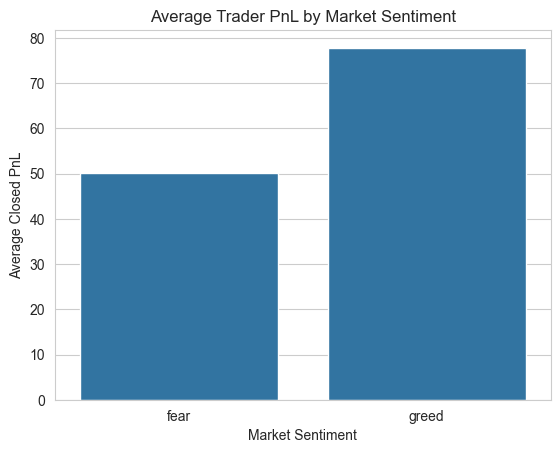

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=performance_summary,
    x="sentiment_simple",
    y="avg_pnl"
)
plt.title("Average Trader PnL by Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.xlabel("Market Sentiment")
plt.show()


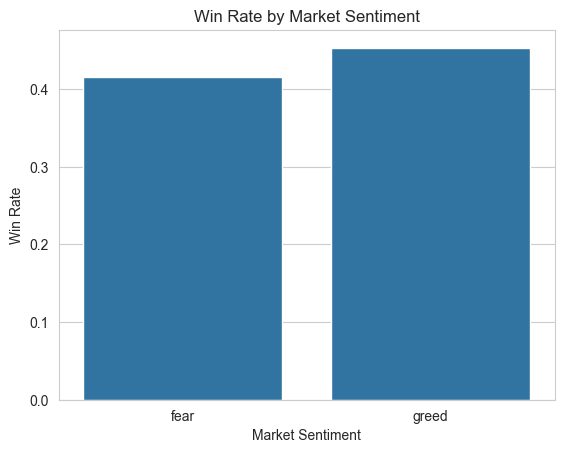

In [47]:
sns.barplot(
    data=performance_summary,
    x="sentiment_simple",
    y="win_rate"
)
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate")
plt.xlabel("Market Sentiment")
plt.show()


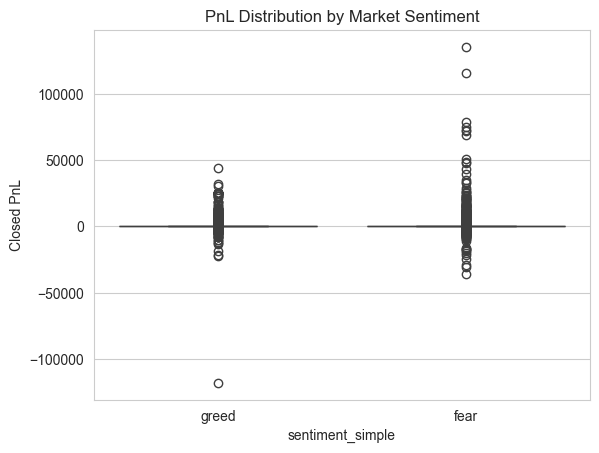

In [48]:
sns.boxplot(
    data=analysis_df,
    x="sentiment_simple",
    y="Closed PnL"
)
plt.title("PnL Distribution by Market Sentiment")
plt.show()


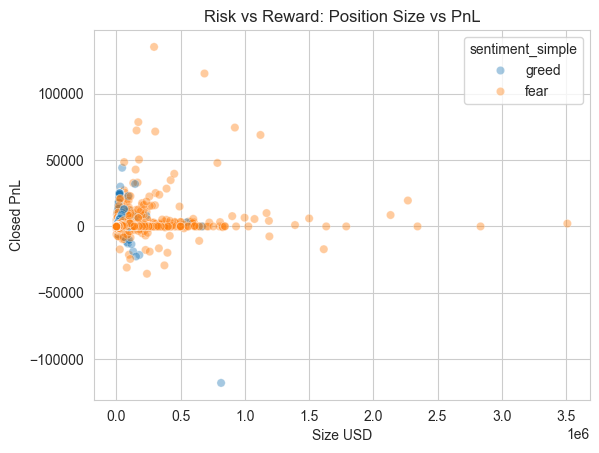

In [49]:
sns.scatterplot(
    data=analysis_df,
    x="Size USD",
    y="Closed PnL",
    hue="sentiment_simple",
    alpha=0.4
)
plt.title("Risk vs Reward: Position Size vs PnL")
plt.show()


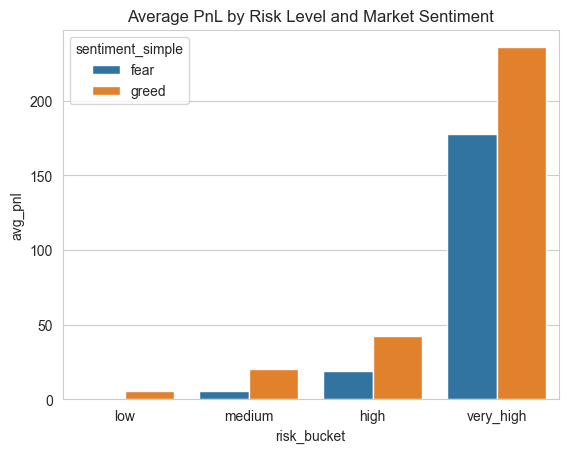

In [50]:
sns.barplot(
    data=risk_pnl_summary,
    x="risk_bucket",
    y="avg_pnl",
    hue="sentiment_simple"
)
plt.title("Average PnL by Risk Level and Market Sentiment")
plt.show()


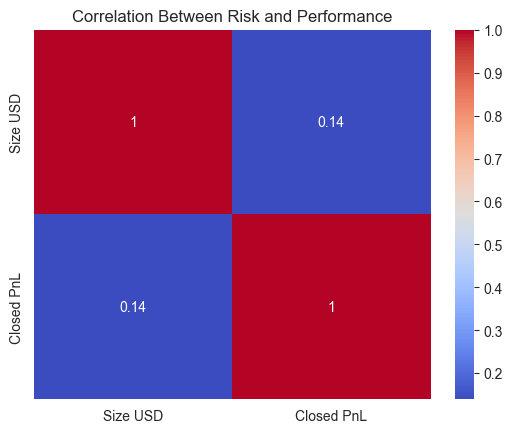

In [51]:
corr = analysis_df[["Size USD", "Closed PnL"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Risk and Performance")
plt.show()
